# Sequential Monte Carlo-based mobility tracking in cellular networks

In [44]:
include("motion_model.jl")
using MAT 
using DataFrames
using Logging

## A Hidden Markov Model for Mobility Tracking
### Problem 1

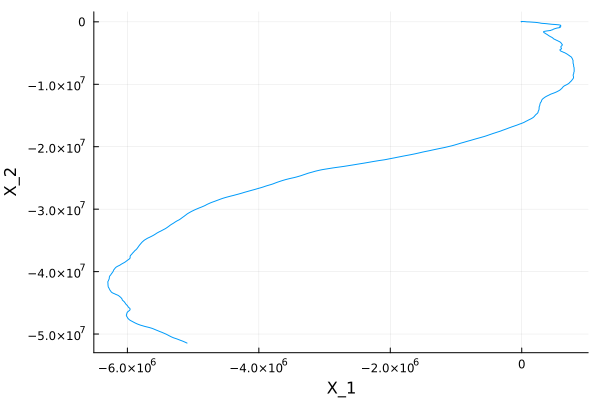

In [45]:
Random.seed!(80085)
simulations = simulate(1, 100000)
plot(simulations[1, :, 1], simulations[1, :, 4],xlabel="X_1", ylabel="X_2", legend=false)
# savefig("figures/motion_model.pdf")

## Mobility Tracking Using SMC Methods
### Problem 3

Notice how the algorithm breaks down because $1 / \omega \rightarrow \infty$

In [46]:
y = matread("RSSI-measurements.mat")["Y"] # SMatrix bad for large arrays
station_positions = SMatrix{2, 6}(matread("stations.mat")["pos_vec"])
n_particles = 200000
stop_time = size(y, 2) # number of time steps
estimated_movement, ω = sis(y, n_particles, stop_time, station_positions,[(x, t, ω) -> x], [6],1.5^2, true)
estimated_movement = estimated_movement[1];

u better work sis <3  13%|█████                          |  ETA: 0:00:42

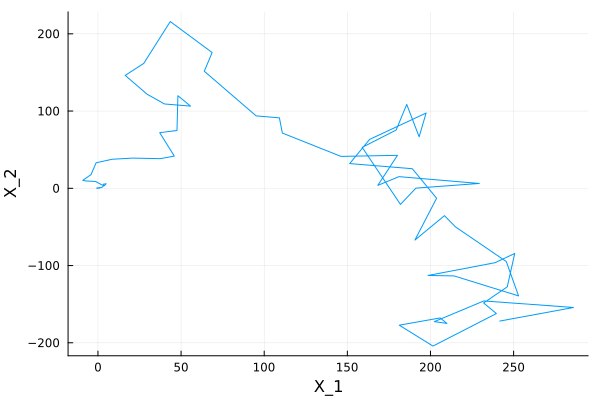

In [47]:
plot(estimated_movement[:, 1], estimated_movement[:, 4], xlabel="X_1", ylabel="X_2", legend=false)
# savefig("figures/estimated_movement.pdf")

┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\toven\.julia\packages\PlotUtils\dVEMd\src\ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\toven\.julia\packages\PlotUtils\dVEMd\src\ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\toven\.julia\packages\PlotUtils\dVEMd\src\ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\toven\.julia\packages\PlotUtils\dVEMd\src\ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\toven\.julia\packages\PlotUtils\dVEMd\src\ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\toven\.julia\packages\PlotUtils\dVEMd\src\ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\toven\.julia\packages\PlotUtils\dVEMd\src\ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\toven\.julia\packages\PlotUtils\dVEMd\src\ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\toven\.julia\packages\PlotUtils\dVEMd\src\ticks.jl:194
┌

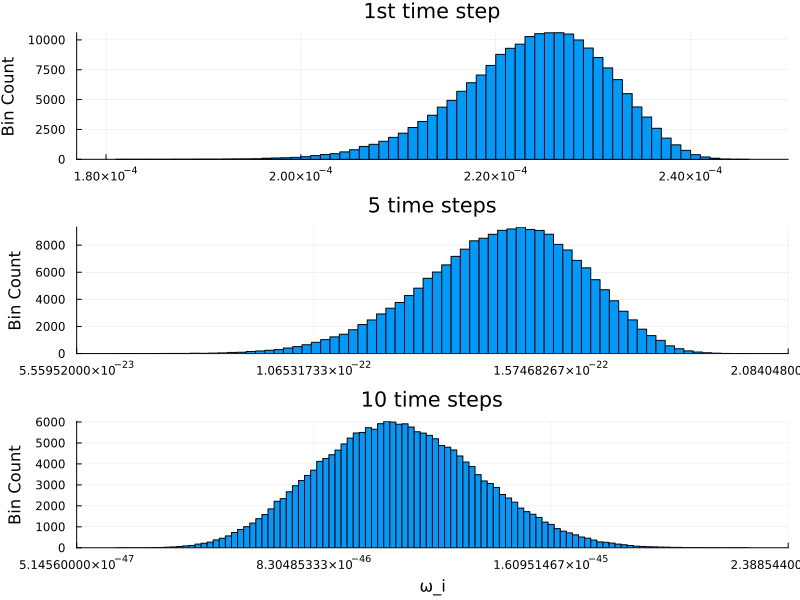

┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\toven\.julia\packages\PlotUtils\dVEMd\src\ticks.jl:194


In [ ]:

p1 = histogram(ω[:, 1], bins=100, title="1st time step", ylabel="Bin Count", legend=false, xticks=:auto)
p2 = histogram(ω[:, 5], bins=100, title="5 time steps", ylabel="Bin Count", legend=false, xticks=:auto)
p3 = histogram(ω[:, 10], bins=100, xlabel="Particle Weight", ylabel="Bin Count", title="10 time steps", legend=false, xticks=:auto)
plot(p1, p2, p3, layout=(3, 1), size=(800, 600))


### Effective Sample Size

In [50]:
function CV_N(weights)
    N = length(weights)
    Ω = sum(weights)
    return sqrt(N * sum((weights ./ Ω .- 1 / N).^2))
end

function efficient_sample_size(weights)
    N = length(weights)
    
    return N / (1 + CV_N(weights)^2)
end

efficient_sample_size (generic function with 1 method)

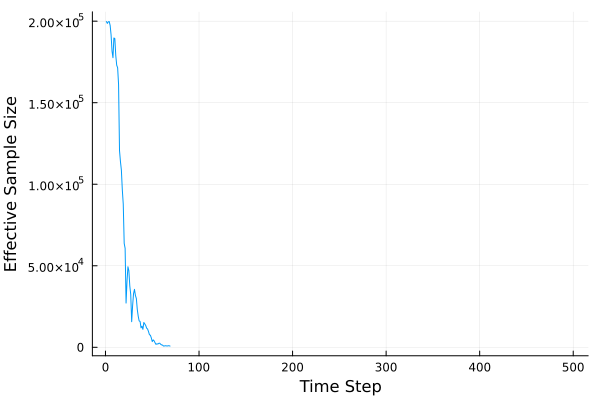

In [51]:
efs_values = zeros(stop_time)
for i in 1:stop_time
    efs_values[i] = efficient_sample_size(ω[:, i])
end
plot(efs_values, xlabel="Time Step", ylabel="Effective Sample Size", legend=false)
# savefig("figures/efs.pdf")

### Problem 4

In [ ]:
n_particles = 200000
stop_time = size(y, 2) # number of time steps
estimated_movement_sisr = sisr(y, n_particles, stop_time, station_positions, [(x, t, ω) -> x],[6], 1.5^2)[1];

u better work sisr <3  53%|████████████████              |  ETA: 0:00:25

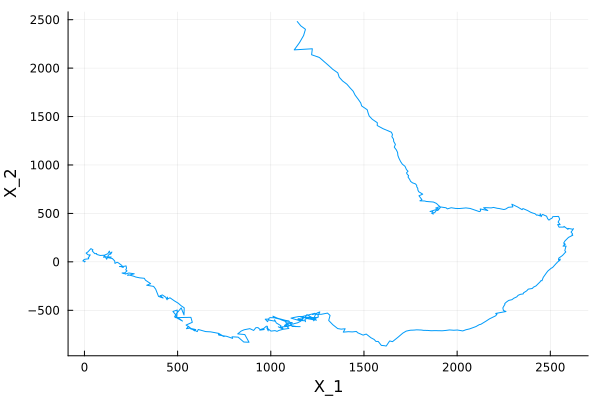

In [ ]:
plot(estimated_movement_sisr[:, 1], estimated_movement_sisr[:, 4], xlabel="X_1", ylabel="X_2", legend=false)
# savefig("figures/estimated_movement_sisr.pdf")

## Problem 5

Grid searching <3 100%|██████████████████████████████████| Time: 0:00:26


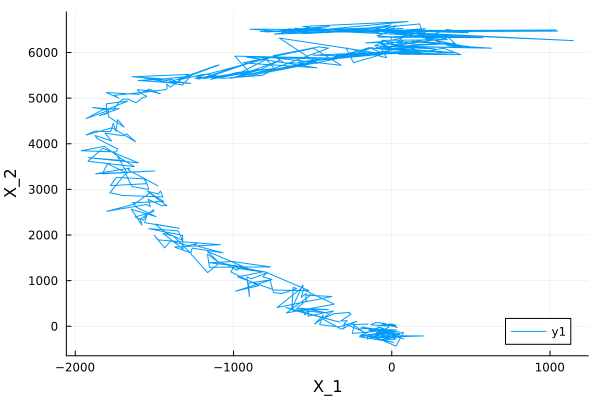

In [ ]:
y_unknown_ς = matread("RSSI-measurements-unknown-sigma.mat")["Y"] # SMatrix bad for large arrays
ς_grid = 3 .^ range(-1, 1, length=100)
n_particles = 20000
stop_time = size(y, 2) # number of time steps

ς_estimate, estimated_movement_unknown_ς = ς_grid_search(y_unknown_ς, n_particles, stop_time, station_positions, ς_grid);
plot(estimated_movement_unknown_ς[:, 1], estimated_movement_unknown_ς[:, 4], xlabel="X_1", ylabel="X_2")


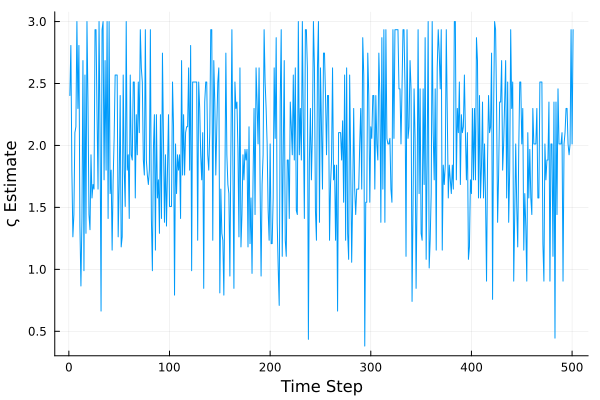

In [ ]:
plot(ς_estimate, xlabel="Time Step", ylabel="ς Estimate", legend=false)
#savefig("figures/ς_estimate.pdf")